In [6]:
def librerias():
  '''importacion de librerias'''
import pandas as pd
import pydotplus
import seaborn as sns
from sklearn import tree
from six import StringIO
from sklearn import metrics
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
print(librerias.__doc__)

importacion de librerias


In [7]:
def cargar():
  ''' Carga de datos del dataset diabetes e impresion'''
df = pd.read_csv("diabetes1.csv")
df.head()
print(df, cargar.__doc__)

      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CLASS  
0    24.0     N  
1    23.0     N

In [8]:
def agrup1():
 '''Agrupo los datos correspondientes al genero para despues manejar de mejor manera los datos'''
df.groupby('Gender').size()
df.groupby('CLASS').size()

print( agrup1.__doc__)

Agrupo los datos correspondientes al genero para despues manejar de mejor manera los datos


In [9]:
def agrup2():
 '''Se realiza la limpieza de datos es decir se reemplaza la minuscula por la letra mayuscula de genero y tambien de la variable objetivo '''
df['Gender']=df['Gender'].replace('f','F')
df['CLASS']=df['CLASS'].replace('Y ','Y')
df['CLASS']=df['CLASS'].replace('N ','N')
print( agrup2.__doc__)

Se realiza la limpieza de datos es decir se reemplaza la minuscula por la letra mayuscula de genero y tambien de la variable objetivo 


In [10]:
def conversion():
 '''Conversion de datos string a numericos de genero'''
dato1 = {'M': 1, 'F': 0}
df['Gender'] = df['Gender'].map(dato1)
print( conversion.__doc__)

Conversion de datos string a numericos de genero


In [11]:
def transformacion():
 '''Conversion de datos string a numericos de CLASS'''
dato2= {'N': 0, 'P': 1, 'Y': 2}
df['CLASS'] = df['CLASS'].map(dato2)
print( transformacion.__doc__)

Conversion de datos string a numericos de CLASS


In [12]:
def imprimir():
 '''Se usa para imprimir '''
df.head()
print( imprimir.__doc__, df.head())

Se usa para imprimir      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI  CLASS  
0  24.0      0  
1  23.0      0  
2  24.0      0  
3  24.0      0  
4  21.0      0  


In [13]:
def caracteristicas():
 '''Se hace uso de los nombres de la variable X como sus caracteristcias y tambien se asigna Y la variable objetivo en este caso nuestra variable objetivo es CLASS''' 
features = ['Gender', 'AGE', 'Urea','Cr','HbA1c', 'Chol', 'TG','HDL','LDL', 'VLDL', 'BMI']
X = df[features]
y = df.CLASS
print( caracteristicas.__doc__,X,y) 

Se hace uso de los nombres de la variable X como sus caracteristcias y tambien se asigna Y la variable objetivo en este caso nuestra variable objetivo es CLASS      Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0         0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1         1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2         0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3         0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4         1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0
..      ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...
995       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6  30.0
996       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2
997       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4
998       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5
999       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0

[1000 rows x 11 columns] 0      0
1

In [14]:
def div():
 '''clasificacion de los datos donde voy a designar el 70% para entrenamiento y el 30% para prueba'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print( div.__doc__)

clasificacion de los datos donde voy a designar el 70% para entrenamiento y el 30% para prueba


In [15]:
def clasificador():
 '''La primera linea de codigo es la construccion de un clasificador, la segunda llama a las caracteristicas y etiquetas y la tercera realiza en si los test para la prediccion.  '''
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print( clasificador.__doc__)

La primera linea de codigo es la construccion de un clasificador, la segunda llama a las caracteristicas y etiquetas y la tercera realiza en si los test para la prediccion.  


In [16]:
def confusion():
 '''Se realiza la creacion de la matriz de confusion tanto de la variable ojetivo como la de prediccion. Y su respectiva impresion.''' 
MatrixConf=(confusion_matrix(y_test, y_pred))
print( confusion.__doc__, MatrixConf)

Se realiza la creacion de la matriz de confusion tanto de la variable ojetivo como la de prediccion. Y su respectiva impresion. [[ 29   0   3]
 [  2  13   1]
 [  4   0 248]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


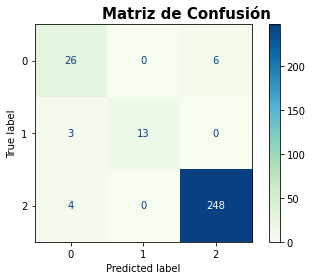

Impresion de la matriz de confusion de forma grafica y caracteristicas del texto de la misma matriz. Ademas de ello define la posicion y tamaño None


In [27]:
def grafica():
    '''Impresion de la matriz de confusion de forma grafica y caracteristicas del texto de la misma matriz. Ademas de ello define la posicion y tamaño'''
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.GnBu)
plt.title("Matriz de Confusión",position=(0.7, 1),fontdict={'weight': 'bold','size': 15})
print(grafica.__doc__, plt.show())

In [18]:
''' Metricas\n'''
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))
''' Interpretacion. La clase 1 en sies que los pacientes que no tuvieron diabetes tuvieron una precision del 83%, mientras los pacientes de la clase 2 obtuvieron una precision del 100% y finalmente la clase 3 de las personas que si tuvieron diabetes es del 98%. Por ende se tiene en cuentra que su precicion es del 97% donde se recomienda la implementacion'''

              precision    recall  f1-score   support

     Class 1       0.83      0.91      0.87        32
     Class 2       1.00      0.81      0.90        16
     Class 3       0.98      0.98      0.98       252

    accuracy                           0.97       300
   macro avg       0.94      0.90      0.92       300
weighted avg       0.97      0.97      0.97       300



' Interpretacion. La clase 1 en sies que los pacientes que no tuvieron diabetes tuvieron una precision del 83%, mientras los pacientes de la clase 2 obtuvieron una precision del 100% y finalmente la clase 3 de las personas que si tuvieron diabetes es del 98%. Por ende se tiene en cuentra que su precicion es del 97% donde se recomienda la implementacion'

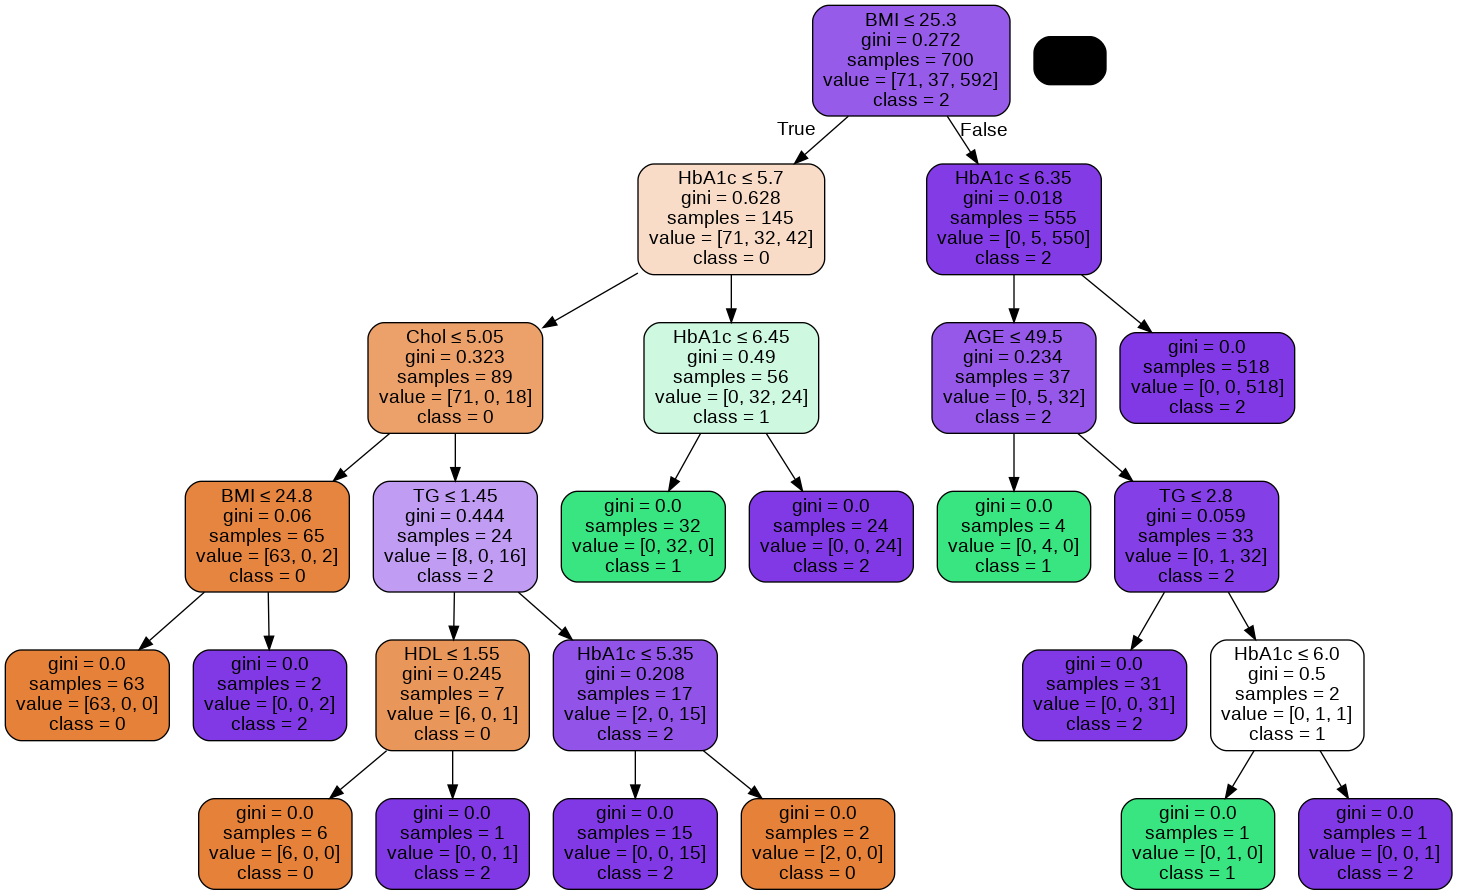

In [19]:
'''Cadenas de texto son de tipo str y se delimitan
 mediante el uso de comillas simples o dobles'''
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
              filled = True, rounded = True,
              special_characters = True,
              feature_names = features,
              class_names = ['0', '1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [20]:
def pruning():
 '''Se realiza la contruccion de un clasificador del entrenamiento. En la segunda linea se hace uso de las etiquetas y las caracteristicas para su entrenamiento. Luego se establece las cadenas de texto. Y finalmente se redondea  para ademas formar la graficas  y que esta este en formato de imagen.'''
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,special_characters = True,
feature_names = features,class_names = ['0', '1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
print( pruning.__doc__)

Se realiza la contruccion de un clasificador del entrenamiento. En la segunda linea se hace uso de las etiquetas y las caracteristicas para su entrenamiento. Luego se establece las cadenas de texto. Y finalmente se redondea  para ademas formar la graficas  y que esta este en formato de imagen.
